In [1]:
import numpy as np
import bigfloat as bgft
import mpmath as mp
import gsw
from scipy import integrate as integ
from scipy import linalg as lin
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

# Question 1.

##(a)

Buoyancy is defined as 

$$ b \equiv f_0 \frac{\psi_1 - \psi_2}{H/2} $$

and the relation between the unperturbed flow and geostrophic streamfunction is

$$ U_1 = - \frac{\partial \psi_1}{\partial y}, \ \ \ \ U_2 = - \frac{\partial \psi_2}{\partial y} $$

so taking the $y$ derivative of equation (1) yields

$$ - \frac{\partial b}{\partial y} = f_0 \frac{- \partial \psi_1 / \partial y + \partial \psi_2 / \partial y}{H/2} = f_0 \frac{U_1 - U_2}{H/2} $$

## (b)

For an unstable condition, we need equation (2) so

$$ - \frac{\partial b}{\partial y} \geq f_0 \frac{\frac{1}{4} \beta L_d^2}{H/2} = \frac{f_0 \ L_d^2}{2H} \frac{2 \Omega}{a} \cos{\theta} = \frac{(2 \Omega)^2 \sin{\theta} \cos{\theta}}{2aH} \frac{N^2 H^2}{(2 \Omega \sin{\theta})^2} = \frac{N^2 H}{2a} \cot{\theta} $$

Now, dividing both sides with $\partial \bar{b}/\partial z = N^2$, we get

$$ \frac{\partial z}{\partial y} \bigg|_\bar{b} \geq \frac{N^2 H}{2a} \frac{1}{N^2} \cot{\theta} $$

Thus, we get

$$ \frac{\partial z}{\partial y} \bigg|_\bar{b}  \geq \frac{H}{2a} \cot{\theta} $$

## (c)

The two-level QGPV equation is

$$ \frac{D}{Dt} \bigg[ \zeta_i + \beta y + \frac{k_d^2}{2} \big( \psi_j - \psi_i \big) \bigg] = 0; \ \ \ \ \ i = 1,2, \ \ \ j = 3 - i $$

where $k_d = \frac{\sqrt{8}}{L_d}$ so the basic PV becomes

$$ \bar{q}_1 = \beta y + \frac{k_d^2}{2} \big( \Psi_2 - \Psi_1 \big) = \beta y + \frac{4}{L_d^2} \big( \Psi_2 - \Psi_1 \big) $$ 
$$ \bar{q}_2 = \beta y - \frac{k_d^2}{2} \big( \Psi_2 - \Psi_1 \big) = \beta y - \frac{4}{L_d^2} \big( \Psi_2 - \Psi_1 \big) $$

From the definition of the streamfunction, $U = - \partial \Psi / \partial y$ so we get

$$ \Psi_1 = - U_1 y, \ \ \ \ \Psi_2 = - U_2 y $$

and thus

$$ \bar{q}_1 = \beta y + \frac{4}{L_d^2} \big( U_1 - U_2 \big) y, \ \ \ \ \bar{q}_2 = \beta y - \frac{4}{L_d^2} \big( U_1 - U_2 \big) y $$ 

Hence, the meridional gradients of the basic QGPV are

$$ \frac{\partial \bar{q}_1}{\partial y} = \beta + \frac{4}{L_d^2} \big( U_1 - U_2 \big), \ \ \ \ \frac{\partial \bar{q}_2}{\partial y} = \beta - \frac{4}{L_d^2} \big( U_1 - U_2 \big) $$

Under unstable conditions, i.e.equation (2), we have

$$ \frac{\partial \bar{q}_1}{\partial y} \geq \beta + \frac{4}{L_d^2} \frac{1}{2} \beta L_d^2 = 3 \beta\ \ \ (>0) $$

$$ \frac{\partial \bar{q}_2}{\partial y} \leq \beta - \frac{4}{L_d^2} \frac{1}{2} \beta L_d^2 = - \beta \ \ \ (<0) $$

# Question 2.

## (a)

In [2]:
L = 5e6   # [m]
J = 101
delta = .5*L / J
y = np.arange( -.5*L+delta, delta, delta )
y_ext = np.arange( -.5*L+delta, .5*L, delta )
u0 = -25e0
Gamma = 1e-5
omega = gsw.earth.OMEGA
a = gsw.earth.earth_radius
beta_eq = 2.*omega/a 

In [3]:
print y.shape, y_ext.shape, y_ext[J-1], y_ext[J], delta

(101,) (201,) -7.45058059692e-09 24752.4752475 24752.4752475


The background velocity, QGPV and its merdional gradient for $ y < 0 $ is defines as

$$ \bar{u}_j =  u_0 - \Gamma y_j $$

$$ \bar{q}_j = \beta y_j + \Gamma $$

$$ {\bar{q}_y}_j = \beta \ \ \ (j=1,2,\cdots,J-1), \ \ \ \ {\bar{q}_y}_J = \beta - \frac{\partial^2 \bar{u}_J}{\partial y^2} $$

In [4]:
ubar = u0 - Gamma * y

ubar_ext = y_ext.copy()
ubar_ext[:] = 0.
ubar_ext[:J] = ubar
ubar_ext[J:] = u0 + Gamma * y_ext[J:]

qbar = beta_eq * y + Gamma
qbar_y = qbar.copy()
qbar_y[:-1] = beta_eq
qbar_y[-1] = beta_eq - (ubar_ext[J-2]-2.*ubar_ext[J-1]+ubar_ext[J])/delta**2

Rearranging equation (6) gives:

$$ \big( \bar{u} - c \big) \frac{\partial^2}{\partial y^2} \psi + \bigg[ \frac{\partial \bar{q}}{\partial y} - m^2 \big( \bar{u} - c \big) \bigg] \psi = 0 $$

$$ \therefore \bar{u} \frac{\partial^2}{\partial y^2} \psi + \bigg( \frac{\partial \bar{q}}{\partial y} - m^2 \bar{u} \bigg) \psi = c \bigg( \frac{\partial^2}{\partial y^2} - m^2 \bigg) \psi \ \ \ \ \ \ (6-1) $$

Now, the second order derivative is differentiated as

$$ \frac{\partial^2 \psi}{\partial y^2} \bigg|_{y_1} \approx \frac{\psi_2 - 2 \psi_1}{\delta^2} $$

$$ \frac{\partial^2 \psi}{\partial y^2} \bigg|_{y_j} \approx \frac{\psi_{j+1} - 2 \psi_j + \psi_{j-1}}{\delta^2} $$

$$ \frac{\partial^2 \psi}{\partial y^2} \bigg|_{y_J} \approx \frac{ - 2 \psi_J + 2 \psi_{J-1}}{\delta^2} $$

so in a linear albegraic form of the LHS of equation (6-1), we have

$$\left(
    \begin{array}{ccccccc}
      \frac{-2 \bar{u}_1}{\delta^2} + {\bar{q}_y}_1 - m^2 \bar{u}_1 & \frac{\bar{u}_1}{\delta^2} & 0 & 0 & 0 & \ldots & 0 \\
      \frac{\bar{u}_2}{\delta^2} & \frac{-2 \bar{u}_2}{\delta^2} + {\bar{q}_y}_2 - m^2 \bar{u}_2 & \frac{\bar{u}_2}{\delta^2} & 0 & 0 & \ldots & 0 \\
      0 & \frac{\bar{u}_3}{\delta^2} & \frac{-2 \bar{u}_3}{\delta^2} + {\bar{q}_y}_3 - m^2 \bar{u}_3 & \frac{\bar{u}_3}{\delta^2} & 0 & \ldots & 0 \\
      \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
      0 & \ldots & 0 & 0 & \frac{\bar{u}_{J-1}}{\delta^2} & \frac{-2 \bar{u}_{J-1}}{\delta^2} + {\bar{q}_y}_{J-1} - m^2 \bar{u}_{J-1} & \frac{\bar{u}_{J-1}}{\delta^2} \\
      0 & \ldots & 0 & 0 & 0 & \frac{2 \bar{u}_J}{\delta^2} & \frac{-2 \bar{u}_J}{\delta^2} + {\bar{q}_y}_J - m^2 \bar{u}_J
    \end{array}
  \right) 
  \left(
    \begin{array}{c}
      \psi_1^n \\
      \psi_2^n \\
      \psi_3^n \\
      \vdots \\
      \psi_{J-1}^n \\
      \psi_J^n
    \end{array}
  \right) \equiv \boldsymbol{A} \ \boldsymbol{\psi}^n $$
  
where the superscripts $n$ describe the eigenmodes and the RHS of equation (6-1) is differentiated as

$$ c \left(
    \begin{array}{cccccc}
      \frac{-2}{\delta^2} - m^2 & \frac{1}{\delta^2} & 0 & 0 & 0 & \ldots & 0 \\
      \frac{1}{\delta^2} & \frac{-2}{\delta^2} - m^2 & \frac{1}{\delta^2} & 0 & 0 & \ldots & 0 \\
      0 & \frac{1}{\delta^2} & \frac{-2}{\delta^2} - m^2 & \frac{1}{\delta^2} & 0 & \ldots & 0 \\
      \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
      0 & \ldots & \ldots & 0 & \frac{1}{\delta^2} & \frac{-2}{\delta^2} - m^2 & \frac{1}{\delta^2} \\
      0 & \ldots & \ldots & 0 & 0 & \frac{2}{\delta^2} & \frac{-2}{\delta^2} - m^2
    \end{array}
  \right) 
  \left(
    \begin{array}{c}
      \psi_1^n \\
      \psi_2^n \\
      \vdots \\
      \psi_J^n
    \end{array}
  \right) \equiv c \boldsymbol{B} \ \boldsymbol{\psi}^n $$

Hence, the eigen problem becomes:

$$ \boldsymbol{B}^{-1} \boldsymbol{A} \boldsymbol{\psi}^n = c \ \boldsymbol{\psi}^n $$

### i.

Solve for the eigenvalues and eigenvectors of $A$

In [5]:
N = np.arange(1, 28).astype(int)
m = N / a

In [6]:
c_FGM = np.zeros( len(m), dtype=complex )
psi_FGM = np.zeros( (J, len(m)), dtype=complex )

for i in range(len(m)):
    A = np.zeros( (J, J) )
    B = A.copy()

    for j in range(J):
        if j == 0:
            A[j, j] = - 2.*ubar[j]/delta**2 + qbar_y[j] - m[i]**2*ubar[j]
            A[j, j+1] = ubar[j]/delta**2
        elif j < J-1 and j > 0:
            A[j, j] = - 2.*ubar[j]/delta**2 + qbar_y[j] - m[i]**2*ubar[j]
            A[j, j-1] = ubar[j]/delta**2
            A[j, j+1] = ubar[j]/delta**2
        else:
            A[j, j] = - 2.*ubar[j]/delta**2 + qbar_y[j] - m[i]**2*ubar[j]
            A[j, j-1] = 2.*ubar[j]/delta**2
            
    for j in range(J):
        if j == 0:
            B[j, j] = - 2./delta**2 - m[i]**2
            B[j, j+1] = 1./delta**2
        elif j < J-1 and j > 0:
            B[j, j] = - 2./delta**2 - m[i]**2
            B[j, j-1] = 1./delta**2
            B[j, j+1] = 1./delta**2
        else:
            B[j, j] = - 2./delta**2 - m[i]**2
            B[j, j-1] = 2./delta**2
            
    c, psi = lin.eig( np.dot(lin.inv(B), A) )
    
#     if i == 2:
#         print c
    
# Rearange the column vectors so that the eigenvector corresponding to the largest imagenary part in the eigen values comes to the leftend
    eigen_id = np.argsort( c.imag )[::-1]     
    
    psi = psi[:, eigen_id]
    c_FGM[i] = c[eigen_id][0]
    psi_FGM[:, i] = psi[:, 0]
    
    
c_FGM[ c_FGM.real==0. ] = np.nan
c_FGM[ c_FGM.imag==0. ] = np.nan

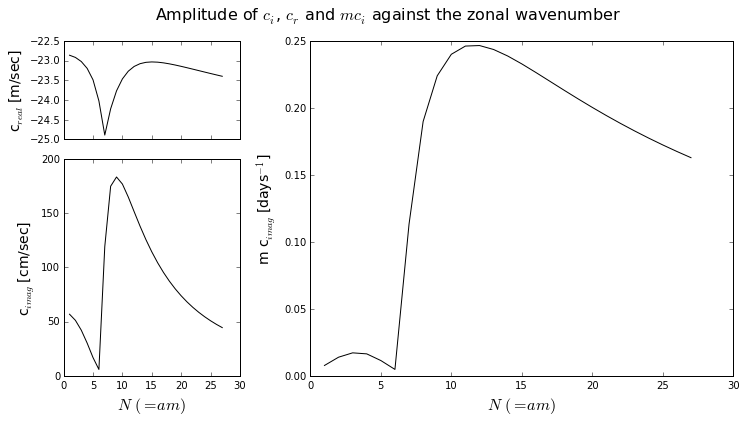

In [7]:
f = plt.figure( figsize=(12, 6) )

plt.suptitle(r'Amplitude of $c_i$, $c_r$ and $mc_i$ against the zonal wavenumber', fontsize=16)

gs1 = GridSpec(3, 3)
gs1.update(hspace=0.2, wspace=0.4)
ax1 = plt.subplot(gs1[0, 0])
ax2 = plt.subplot(gs1[1:, 0])
ax3 = plt.subplot(gs1[:, 1:])

ax1.plot( N, c_FGM.real, 'k' )
ax1.set_ylabel(r'c$_{real}$ [m/sec]', fontsize=14)
ax1.set_xticklabels('')

ax2.plot( N, c_FGM.imag*1e2, 'k' )
ax2.set_ylabel(r'c$_{imag}$ [cm/sec]', fontsize=14)
ax2.set_xlabel(r'$N \ (= a m)$', fontsize=16)

ax3.plot( N, m*c_FGM.imag*24.*3600., 'k' )
ax3.set_ylabel(r'm c$_{imag}$ [days$^{-1}$]', fontsize=14)
ax3.set_xlabel(r'$N \ (= a m)$', fontsize=16)

### ii.

For $\eta = 0$, the tropopause becomes

$$ y_c = \frac{\Gamma}{\beta} $$

and the normalized squared amplitude of the streamfunction is

$$ |\breve{\psi}_j|^2 = \frac{2J+1}{|\psi_{J}|^2+2\sum_{i=0}^{J-1} |\psi_i|^2} |\psi_j|^2 $$

In [10]:
# The psi_func funtion is defined later on in the notebook

y_J16, delta_J16, psi_a2_J16, c_a2_J16, m_a2_J16, N_a2_J16, ubar_a2_J16, qbar_a2_J16 = psi_func(J=16)

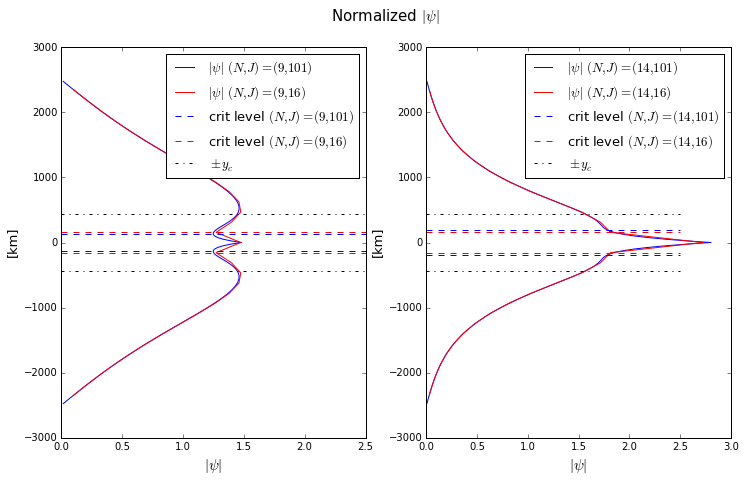

In [11]:
crit_lev_9 = y[np.argmin( np.abs(c_FGM.real[8] - ubar) )] * np.ones(N[-1])
crit_lev_14 = y[np.argmin( np.abs(c_FGM.real[13] - ubar) )] * np.ones(N[-1])
crit_lev_9_J16 = y_J16[np.argmin( np.abs(c_a2_J16.real[8] - ubar_a2_J16) )] * np.ones(N[-1])
crit_lev_14_J16 = y_J16[np.argmin( np.abs(c_a2_J16.real[13] - ubar_a2_J16) )] * np.ones(N[-1])
y_c = Gamma/beta_eq * np.ones(N[-1])
x_for_crit = np.linspace(0., 2.5e0, N[-1])

fig = plt.figure( figsize=(12,7) )

plt.suptitle(r'Normalized $|\psi|$', fontsize=15)

ax1 = fig.add_subplot(121)
ax1.plot(np.sqrt( np.abs(psi_FGM[:, 8])**2 / ( np.abs(psi_FGM[-1, 8])**2 + 2*(np.abs(psi_FGM[:-1, 8])**2).sum() )*(2*J + 1) ), 
                 y*1e-3, 'b', label=r'$|\psi| \ (N, J) = (9, 101)$')
ax1.plot(np.sqrt( np.abs(psi_FGM[:, 8])**2 / ( np.abs(psi_FGM[-1, 8])**2 + 2*(np.abs(psi_FGM[:-1, 8])**2).sum() )*(2*J + 1) ), 
                 - y*1e-3, 'b')
ax1.plot(np.sqrt( np.abs(psi_a2_J16[:, 8])**2 /( np.abs(psi_a2_J16[-1, 8])**2 + 2*(np.abs(psi_a2_J16[:-1, 8])**2).sum() )*(2*16 + 1) ), 
                 y_J16*1e-3, 'r', label=r'$|\psi| \ (N, J) = (9, 16)$')
ax1.plot(np.sqrt( np.abs(psi_a2_J16[:, 8])**2 / ( np.abs(psi_a2_J16[-1, 8])**2 + 2*(np.abs(psi_a2_J16[:-1, 8])**2).sum() )*(2*16 + 1) ), 
                 - y_J16*1e-3, 'r')
ax1.plot(x_for_crit, crit_lev_9*1e-3, 'b--', label=r'crit level $(N, J)=(9,101)$')
ax1.plot(x_for_crit, -crit_lev_9*1e-3, 'b--')
ax1.plot(x_for_crit, crit_lev_9_J16*1e-3, 'r--', label=r'crit level $(N, J)=(9,16)$')
ax1.plot(x_for_crit, -crit_lev_9_J16*1e-3, 'r--')
ax1.plot(x_for_crit, y_c*1e-3, 'k-.', label=r'$\pm y_c$')
ax1.plot(x_for_crit, -y_c*1e-3, 'k-.')
ax1.set_ylabel(r'[km]', fontsize=13)
ax1.set_xlabel(r'$|\psi|$', fontsize=15)
plt.legend(loc='upper right', fontsize=13)

ax2 = fig.add_subplot(122)
ax2.plot(np.sqrt( np.abs(psi_FGM[:, 13])**2 / ( np.abs(psi_FGM[-1, 13])**2 + 2*(np.abs(psi_FGM[:-1, 13])**2).sum() )*(2*J + 1) ), 
                 y*1e-3, 'b', label=r'$|\psi| \ (N, J) = (14, 101)$')
ax2.plot(np.sqrt( np.abs(psi_FGM[:, 13])**2 / ( np.abs(psi_FGM[-1, 13])**2 + 2*(np.abs(psi_FGM[:-1, 13])**2).sum() )*(2*J + 1) ), 
                 - y*1e-3, 'b')
ax2.plot(np.sqrt( np.abs(psi_a2_J16[:, 13])**2 / ( np.abs(psi_a2_J16[-1, 13])**2 + 2*(np.abs(psi_a2_J16[:-1, 13])**2).sum() )*(2*16 + 1) ), 
                 y_J16*1e-3, 'r', label=r'$|\psi| \ (N, J) = (14, 16)$')
ax2.plot(np.sqrt( np.abs(psi_a2_J16[:, 13])**2 / ( np.abs(psi_a2_J16[-1, 13])**2 + 2.*(np.abs(psi_a2_J16[:-1, 13])**2).sum() )*(2*16 + 1) ), 
                 - y_J16*1e-3, 'r')
ax2.plot(x_for_crit, crit_lev_14*1e-3, 'b--', label=r'crit level $(N, J)=(14,101)$')
ax2.plot(x_for_crit, -crit_lev_14*1e-3, 'b--')
ax2.plot(x_for_crit, crit_lev_14_J16*1e-3, 'r--', label=r'crit level $(N, J)=(14,16)$')
ax2.plot(x_for_crit, -crit_lev_14_J16*1e-3, 'r--')
ax2.plot(x_for_crit, y_c*1e-3, 'k-.', label=r'$\pm y_c$')
ax2.plot(x_for_crit, -y_c*1e-3, 'k-.')
ax2.set_ylabel(r'[km]', fontsize=13)
ax2.set_xlabel(r'$|\psi|$', fontsize=15)
plt.legend(loc='upper right', fontsize=13)

#### Comments

For $N=9$, the critical level is closer to $y=0$ when the resolution is higher but reverses for $N=14$. We see that the amplitude of the streamfunction is more amplified near $y=0$ for $N=14$, which indicates a surface intensified instability.

### iii.

In [15]:
sigma = c_FGM.imag * m
N_FGM = N[np.argmax(sigma)]
print 'N corresponding to the fastest-growing mode is: ', N_FGM

N corresponding to the fastest-growing mode is:  12


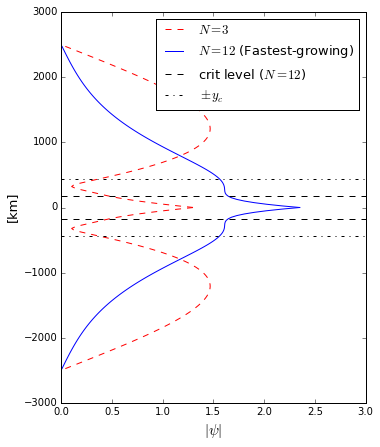

In [14]:
crit_lev_12 = y[np.argmin( np.abs(c_FGM.real[11] - ubar) )] * np.ones(N[-1])
x_for_crit = np.linspace(0., 3e0, N[-1])

fig = plt.figure( figsize=(12,7) )

ax1 = fig.add_subplot(121)
ax1.plot(np.sqrt( np.abs(psi_FGM[:, 2])**2 / ( np.abs(psi_FGM[-1, 2])**2 + 2*(np.abs(psi_FGM[:-1, 2])**2).sum() )*(2*J+1) ), 
        y*1e-3, 'r--', label=r'$N=3$')
ax1.plot(np.sqrt( np.abs(psi_FGM[:, 11])**2 / ( np.abs(psi_FGM[-1, 11])**2 + 2*(np.abs(psi_FGM[:-1, 11])**2).sum() )*(2*J+1) ), 
        y*1e-3, 'b', label=r'$N=12$ (Fastest-growing)')
ax1.plot(np.sqrt( np.abs(psi_FGM[:, 2])**2 / ( np.abs(psi_FGM[-1, 2])**2 + 2*(np.abs(psi_FGM[:-1, 2])**2).sum() )*(2*J+1) ), 
        - y*1e-3, 'r--')
ax1.plot(np.sqrt( np.abs(psi_FGM[:, 11])**2 / ( np.abs(psi_FGM[-1, 11])**2 + 2*(np.abs(psi_FGM[:-1, 11])**2).sum() )*(2*J+1) ), 
        - y*1e-3, 'b')
ax1.plot(x_for_crit, crit_lev_12*1e-3, 'k--', label=r'crit level ($N=12$)')
ax1.plot(x_for_crit, -crit_lev_12*1e-3, 'k--')
ax1.plot(x_for_crit, y_c*1e-3, 'k-.', label=r'$\pm y_c$')
ax1.plot(x_for_crit, -y_c*1e-3, 'k-.')
ax1.set_ylabel(r'[km]', fontsize=13)
ax1.set_xlabel(r'$|\psi|$', fontsize=15)
plt.legend(loc='upper right', fontsize=13)

### iv.

#### Define function that solves for $\psi$ and the eigen modes

In [9]:
def psi_func(N=np.arange(1,101).astype(int), L = 5e6, J = 101, u0=-25e0, Gamma=1e-5, 
             omega=gsw.earth.OMEGA, a=gsw.earth.earth_radius):
    
    delta = .5*L / J
    y = np.arange( -.5*L+delta, delta, delta )
    y_ext = np.arange( -.5*L+delta, .5*L, delta )

    beta_eq = 2.*omega/a
    
    ubar = u0 - Gamma * y

    ubar_ext = y_ext.copy()
    ubar_ext[:] = 0.
    ubar_ext[:J] = ubar
    ubar_ext[J:] = u0 + Gamma * y_ext[J:]

    qbar = beta_eq * y + Gamma
    qbar_y = qbar.copy()
    qbar_y[:-1] = beta_eq
    qbar_y[-1] = beta_eq - (ubar_ext[J-2]-2.*ubar_ext[J-1]+ubar_ext[J])/delta**2

    m = N / a

    c_FGM = np.zeros( len(m), dtype=complex )
    psi_FGM = np.zeros( (J, len(m)), dtype=complex )

    for i in range(len(m)):
        A = np.zeros((J, J))
        B = A.copy()

        for j in range(J):
            if j == 0:
                A[j, j] = - 2.*ubar[j]/delta**2 + qbar_y[j] - m[i]**2*ubar[j]
                A[j, j+1] = ubar[j]/delta**2
            elif j < J-1 and j > 0:
                A[j, j] = - 2.*ubar[j]/delta**2 + qbar_y[j] - m[i]**2*ubar[j]
                A[j, j-1] = ubar[j]/delta**2
                A[j, j+1] = ubar[j]/delta**2
            else:
                A[j, j] = - 2.*ubar[j]/delta**2 + qbar_y[j] - m[i]**2*ubar[j]
                A[j, j-1] = 2.*ubar[j]/delta**2
            
        for j in range(J):
            if j == 0:
                B[j, j] = - 2./delta**2 - m[i]**2
                B[j, j+1] = 1./delta**2
            elif j < J-1 and j > 0:
                B[j, j] = - 2./delta**2 - m[i]**2
                B[j, j-1] = 1./delta**2
                B[j, j+1] = 1./delta**2
            else:
                B[j, j] = - 2./delta**2 - m[i]**2
                B[j, j-1] = 2./delta**2
            
        c, psi = lin.eig( np.dot(lin.inv(B), A) )
    
# Rearange the column vectors so that the eigenvector corresponding to the largest imagenary part in the eigen values comes to the leftend
        eigen_id = np.argsort( c.imag )[::-1]     
    
        psi = psi[:, eigen_id]
        c_FGM[i] = c[eigen_id][0]
        psi_FGM[:, i] = psi[:, 0]
    
    
    c_FGM[ c_FGM.real==0. ] = np.nan
    c_FGM[ c_FGM.imag==0. ] = np.nan
    
    return y, delta, psi_FGM, c_FGM, m, N, ubar, qbar

In [18]:
y, delta, psi_a3, c_a3, m_a3, N_a3, ubar, qbar = psi_func() 

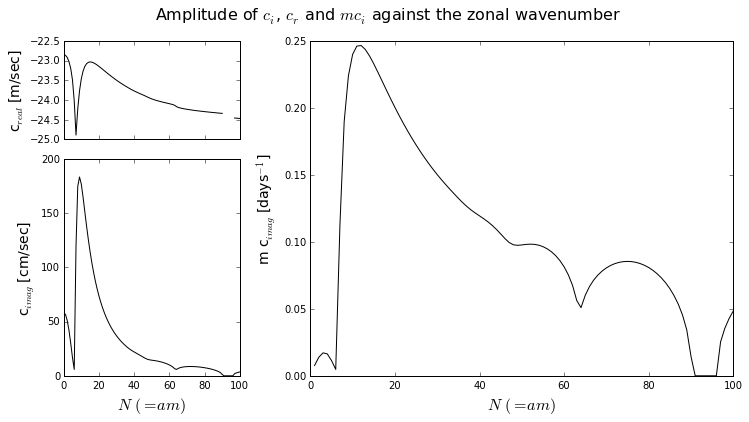

In [19]:
f = plt.figure( figsize=(12, 6) )

plt.suptitle(r'Amplitude of $c_i$, $c_r$ and $mc_i$ against the zonal wavenumber', fontsize=16)

gs1 = GridSpec(3, 3)
gs1.update(hspace=0.2, wspace=0.4)
ax1 = plt.subplot(gs1[0, 0])
ax2 = plt.subplot(gs1[1:, 0])
ax3 = plt.subplot(gs1[:, 1:])

ax1.plot( N_a3, c_a3.real, 'k' )
ax1.set_ylabel(r'c$_{real}$ [m/sec]', fontsize=14)
ax1.set_xticklabels('')

ax2.plot( N_a3, c_a3.imag*1e2, 'k' )
ax2.set_ylabel(r'c$_{imag}$ [cm/sec]', fontsize=14)
ax2.set_xlabel(r'$N \ (= a m)$', fontsize=16)

ax3.plot( N_a3, m_a3*c_a3.imag*24.*3600., 'k' )
ax3.set_ylabel(r'm c$_{imag}$ [days$^{-1}$]', fontsize=14)
ax3.set_xlabel(r'$N \ (= a m)$', fontsize=16)

In [20]:
print 1./(m_a3*c_a3.imag).max()/24./36e2, 1./(m_a3[99]*c_a3.imag[99])/24./36e2

4.0550690273 20.6612815956


#### Comments

The eigenvalue for $N=100$ has a positive imaginary part so it is unstable. Since the growing component of the wave is $e^{\ \sigma t} = e^{\ m c_i t}$, the $e$-folding time is defined as $t_e = \frac{1}{m c_i}$. Thus, for the fastest-growing mode $(N=12)$ is $4.06$ days whileas for $N=100$, it is $20.7$ days.

### v.

From question (a) iii. the critical level is closer to the equator than $y_c$ (equivalent of the tropopause in the Charney problem), which implies the existance of evanesence modes between the critical level and $y_c$. As for the fastest-growing mode, the eigenfunction amplitude is concentrated close to $y=0$ (equivalent to the surface in the Charney problem). Unlike non-linear instability, linear instability cannot remove the surface temperature gradient so instability is condined to the surface and cannot reproduce a double maximum as seen in observational eddy geopotential amplitudes.

## (b)

### i.

Since $\bar{q}$ is continuous at $y = y_c$, using equation (12) and (13), we get

$$ \beta y_c - \Gamma = \eta y_c \ \ \ \ \therefore y_c = \frac{\Gamma}{\beta - \eta} $$

### ii.

From conservation of enstrophy, we have

$$ \langle \overline{q}_i^2 \rangle = \langle \overline{q}_f^2 \rangle + \langle \overline{q_f'^2} \rangle $$

Now,

$$ L \langle \overline{q}_i^2 \rangle = \int_{-L/2}^0 (\beta y + \Gamma )^2 \ dy \ \ \ (-L/2 < y < 0) $$

$$ L \langle \overline{q}_i^2 \rangle = \int_{-L/2}^0 (\beta y - \Gamma )^2 \ dy \ \ \ \ (0 < y < L/2) $$

and

$$ L \langle \overline{q}_f^2 \rangle = \int_{-L/2}^{-y_c} ( \beta y + \Gamma )^2 \ dy \ \ \ (-L/2 < y < -y_c) $$

$$ L \langle \overline{q}_f^2 \rangle = \int_{-y_c}^{y_c} ( \eta y )^2 \ dy \ \ \ \ \ \ \ \ \ \ (-y_c < y < y_c) $$

$$ L \langle \overline{q}_f^2 \rangle = \int_{y_c}^{L/2} ( \beta y - \Gamma )^2 \ dy \ \ \ \ \ \ (y_c < y < L/2) $$

Thus,

$$ L \langle \overline{q}_i^2 \rangle = \big[ \frac{1}{3} \beta^2 y^3 + \Gamma \beta y^2 + \Gamma^2 y \big]^0_{-L/2} + \big[ \frac{1}{3} \beta^2 y^3 - \Gamma \beta y^2 + \Gamma^2 y \big]_0^{L/2} = \frac{2}{3} \beta^2 \big( \frac{L}{2} \big)^3 - 2 \Gamma \beta \big( \frac{L}{2} \big)^2 + \Gamma^2 L $$

$$ L \langle \overline{q}_f^2 \rangle = \big[ \frac{1}{3} \beta^2 y^3 + \Gamma \beta y^2 + \Gamma^2 y \big]^{-y_c}_{-L/2} + \big[ \frac{1}{3} \eta^2 y^3 \big]^{y_c}_{-y_c} + \big[ \frac{1}{3} \beta^2 y^3 - \Gamma \beta y^2 + \Gamma^2 y \big]_{y_c}^{-L/2} $$

$$ = \frac{2}{3} \beta^2 \big( \frac{L}{2} \big)^3 - 2 \Gamma \beta \big( \frac{L}{2} \big)^2 + \Gamma^2 L - \frac{2}{3} \beta^2 y_c^3 + 2 \Gamma \beta y_c^2 - 2\Gamma^2 y_c + \frac{2}{3} \eta^2 y_c^3 $$

$$ \therefore \ \ \ \  L \big( \langle \overline{q}_i^2 \rangle - \langle \overline{q}_f^2 \rangle \big) = \frac{2}{3} \beta^2 {y_c}^3 - 2 \Gamma \beta {y_c}^2 + 2\Gamma^2 y_c - \frac{2}{3} \eta^2 {y_c}^3 $$

$$ = \frac{2}{3} \beta^2 \big( \frac{\Gamma}{\beta - \eta} \big)^3 - 2 \Gamma \beta \big( \frac{\Gamma}{\beta - \eta} \big)^2 + 2\Gamma^2 \frac{\Gamma}{\beta - \eta} - \frac{2}{3} \eta^2 \big( \frac{\Gamma}{\beta - \eta} \big)^3 $$

$$ = \frac{\Gamma}{\beta - \eta} \bigg[ \frac{2}{3} \beta^2 \big( \frac{\Gamma}{\beta - \eta} \big)^2 - 2 \Gamma \beta \big( \frac{\Gamma}{\beta - \eta} \big) + 2\Gamma^2 - \frac{2}{3} \eta^2 \big( \frac{\Gamma}{\beta - \eta} \big)^2 \bigg] $$

$$ = \frac{\Gamma}{\beta - \eta} \frac{2\beta^2\Gamma^2 - 6\Gamma^2\beta (\beta - \eta) + 6\Gamma^2 (\beta - \eta)^2 - 2\eta^2\Gamma^2}{3 (\beta - \eta)^2} $$

$$ = \frac{2\Gamma^3}{3(\beta - \eta)} \frac{\beta^2 - 3\eta\beta + 2\eta^2}{(\beta - \eta)^2} $$

$$ = \frac{2\Gamma^3 (\beta - 2\eta)}{3(\beta - \eta)^2} $$

and we get

$$ \langle \overline{q_f'^2} \rangle = \langle \overline{q}_i^2 \rangle - \langle \overline{q}_f^2 \rangle = \frac{2\Gamma^3 \ (\beta - 2\eta)}{3L \ (\beta - \eta)^2} $$

### iii.

We shall take the derivative of $\langle \overline{q_f'^2} \rangle$ respective to $\eta$. Defining

$$ f(\eta) = \frac{\beta - 2\eta}{(\beta - \eta)^2} $$

we have 

$$ \frac{\partial f}{\partial \eta} = \frac{-2(\beta - \eta)^2 + (\beta - 2\eta) \cdot 2(\beta - \eta)}{(\beta - \eta)^4}$$ 

$$ = 2 \frac{- (\beta - \eta) + (\beta - 2\eta}{(\beta - \eta)^3} = 2 \frac{- \eta}{(\beta - \eta)^3} $$

|   $\eta$  | $\cdots$ |   0   | $\cdots$ |  $\beta$  |
|------|------|------|
|  $\frac{\partial f}{\partial \eta}$  | $+$ |   0   | $-$ |      |
|    $f$  | $\nearrow$ | 1 | $\searrow$ |       |

From the derivative sign chart above, we see that $\langle \overline{q_f'^2} \rangle$ is largest for $\eta=0$.

### iv.

$$\bar{q}_f = \beta y + \Gamma \ \ \ \ (-L/2 < y < -y_c)$$

$$\bar{q}_f = \eta y \ \ \ \ \ \ \ (-y_c < y < y_c)$$

$$\bar{q}_f = \beta y - \Gamma \ \ \ \ \ (y_c < y < L/2)$$

and using $\partial \bar{u}/\partial y = \beta y - \bar{q}_f$, we have

$$ \bar{u}_i = u_0 + \sum_{j=0}^i (\beta y_j - {\bar{q}_f}_j) \Delta y $$

In [21]:
eta = 0.
y_c = Gamma/beta_eq

i_cL = np.argmin( np.abs(y_ext + y_c) )
i_cH = np.argmin( np.abs(y_ext - y_c) )

print i_cL, i_cH

82 118


In [22]:
ubar_f = np.zeros( y_ext.shape )
dy = np.ones( y_ext.shape ) * delta

ubar_f[:i_cL+1] = u0 + np.cumsum( - Gamma * dy[:i_cL+1] )
ubar_f[i_cL+1:i_cH+1] = ubar_f[i_cL]
ubar_f[i_cH+1:] = ubar_f[i_cH] + np.cumsum( Gamma * dy[i_cH+1:] )

(array([-3000., -2000., -1000.,     0.,  1000.,  2000.,  3000.]),
 <a list of 7 Text yticklabel objects>)

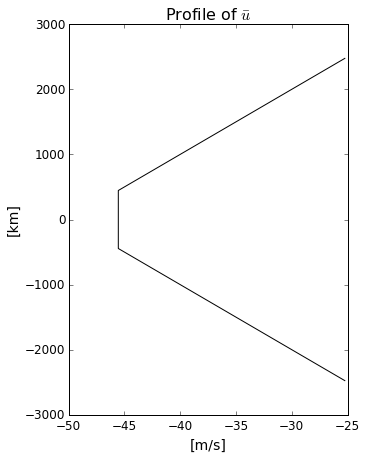

In [23]:
fig = plt.figure(figsize=(5, 7))

ax = plt.gca()
ax.plot(ubar_f, y_ext*1e-3, 'k')
ax.set_title(r'Profile of $\bar{u}$', fontsize=16)
ax.set_ylabel(r'[km]', fontsize=14)
ax.set_xlabel(r'[m/s]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

### v.

$\eta$ being negative means that instability persists in the equilibrated state. Since the mean flow is restored towards its initial profile, there needs to be waves that constantly remove the supplied available potential energy.

Longer $D^{-1}$ is equivalent to less dissipation so less energy will be lost due to dissipation. Hence, $\eta$ should be negative with a larger absolute value to excite unstable waves efficiently. Longer mean-flow restoration time is equivalent to shorter $D^{-1}$ so the $\eta$ should still be negative but with a smaller absolute value.

### vi.

Since $ \frac{\Gamma}{\beta} = y_c = \frac{N}{f_0} z_c $, we get

$$ z_c = \frac{f_0 \Gamma}{\beta N} = \frac{a \Gamma}{N} \frac{\sin{\theta_0}}{\cos{\theta_0}} = a \tan{\theta_0} \frac{\Gamma}{N} $$

Now, 

$$ \Gamma = \frac{f_0}{N} \frac{\partial \bar{u}}{\partial z} = - \frac{1}{N} \frac{\partial \bar{b}}{\partial y} = N \frac{\partial z}{\partial y} \bigg|_{\bar{b}} $$

where we have used the thermal wind equation $\frac{\partial \bar{u}}{\partial z} = \frac{g}{\rho_0 f_0} \frac{\partial \bar{\rho}}{\partial y} = - \frac{1}{f_0} \frac{\partial \bar{b}}{\partial y}$ and $\frac{\partial z}{\partial y} \Big|_{\bar{b}} = - \frac{\frac{\partial \bar{b}}{\partial y}}{\frac{\partial \bar{b}}{\partial z}}$. Thus, combining the two equations gives

$$z_c = a \tan{\theta_0} \frac{\partial z}{\partial y} \bigg|_{\bar{b}} $$